# Import libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from pprint import pprint

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Raw dataset

In [ ]:
raw_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/special topic project/work/raw_dataset_2024-04-25_19-44.csv', encoding='latin-1')

In [ ]:
raw_data.head()

,ID,Start time,Completion time,Email,Name,Last modified time,Please read the above consent form for the collection of your information.\n,Which track are you currently in?\n,Did you enjoy your track courses?\n,Rank your initial track preferences before your track selection (note: this does not need to align with your current track)\n,...,Ensuring the system's security and reliability through testing and quality assurance,"Integrating the system with databases, business intelligence tools, and data analytics","Full-Stack Web Developer: Design and develop both front-end and back-end components of web applications, implement efficient algorithms and data structures, ensure software quality through testi...","Data Engineer: Design and manage database systems, implement data warehousing and data mining solutions, develop intelligent systems for pattern recognition and knowledge management.","Network Administrator: Configure and maintain computer networks, manage network infrastructure and security, troubleshoot network issues, develop network automation scripts.","3D Animator: Create 3D animations and visual effects for movies, games, or multimedia applications, develop computer graphics and character animations, optimize rendering performance.","Business Intelligence Consultant: Analyze business processes and requirements, implement e-business platforms and customer relationship management systems, develop decision support and business ...","Healthcare Information Systems Specialist: Develop and implement healthcare information systems, integrate electronic health records and clinical information systems, ensure compliance with heal...","IT Project Manager: Manage IT projects and resources within an organization, analyze and design business processes, implement decision support and business intelligence solutions, ensure project...","Machine Learning Engineer: Develop and deploy machine learning models, implement efficient algorithms and data structures, apply computer science theories to solve complex problems, work on mach..."
0,7,4-20-24 15:06:02,4-20-24 15:09:52,anonymous,NaN,NaN,I have read and agree to allow the collection ...,DB - Database and Intelligent System,Yes,DB - Database and Intelligent System;CS - Comp...,...,3,3,4,3,1,2,3,2,2,2
1,8,4-20-24 15:12:29,4-20-24 15:14:33,anonymous,NaN,NaN,I have read and agree to allow the collection ...,EB - Electronic Business Systems,Yes,EB - Electronic Business Systems;HT - Health I...,...,3,2,3,2,3,3,4,3,3,3
2,9,4-20-24 15:27:51,4-20-24 15:38:11,anonymous,NaN,NaN,I have read and agree to allow the collection ...,MM - Multimedia Systems,Yes,MM - Multimedia Systems;SE - Software Engineer...,...,1,2,1,1,1,4,4,1,3,1
3,10,4-20-24 15:44:16,4-20-24 15:44:46,anonymous,NaN,NaN,I have read and agree to allow the collection ...,CS - Computer Science,Yes,CS - Computer Science;MM - Multimedia Systems;...,...,2,3,4,3,1,4,3,2,2,3
4,11,4-20-24 15:49:35,4-20-24 15:53:59,anonymous,NaN,NaN,I have read and agree to allow the collection ...,EB - Electronic Business Systems,Yes,EB - Electronic Business Systems;MM - Multimed...,...,2,3,2,2,2,3,3,3,3,2


# Initial preprocessing on raw dataset

In [ ]:
# Remove special characters and newlines from column names
raw_data.columns = raw_data.columns.str.replace(r'[^\w\s]+', '', regex=True)
raw_data.columns = raw_data.columns.str.replace(r'\n', ' ', regex=True)
raw_data.columns = raw_data.columns.str.strip()

In [ ]:
data = raw_data.drop(['ID',
                  'Start time',
                  'Completion time',
                  'Email',
                  'Name',
                  'Last modified time',
                  "Please read the above consent form for the collection of your information"
                  ], axis=1)

In [ ]:
data.head()

,Which track are you currently in,Did you enjoy your track courses,Rank your initial track preferences before your track selection note this does not need to align with your current track,Rank how interestedcomfortable are you with the following subjects,HTMLCSSJS,Scikitlearn,Git,Odoo,PowerBI,NumpyPandas,...,Ensuring the systems security and reliability through testing and quality assurance,Integrating the system with databases business intelligence tools and data analytics,FullStack Web Developer Design and develop both frontend and backend components of web applications implement efficient algorithms and data structures ensure software quality through testi,Data Engineer Design and manage database systems implement data warehousing and data mining solutions develop intelligent systems for pattern recognition and knowledge management,Network Administrator Configure and maintain computer networks manage network infrastructure and security troubleshoot network issues develop network automation scripts,3D Animator Create 3D animations and visual effects for movies games or multimedia applications develop computer graphics and character animations optimize rendering performance,Business Intelligence Consultant Analyze business processes and requirements implement ebusiness platforms and customer relationship management systems develop decision support and business,Healthcare Information Systems Specialist Develop and implement healthcare information systems integrate electronic health records and clinical information systems ensure compliance with heal,IT Project Manager Manage IT projects and resources within an organization analyze and design business processes implement decision support and business intelligence solutions ensure project,Machine Learning Engineer Develop and deploy machine learning models implement efficient algorithms and data structures apply computer science theories to solve complex problems work on mach
0,DB - Database and Intelligent System,Yes,DB - Database and Intelligent System;CS - Comp...,Database Management System;Artificial Intellig...,4,2,2,4,4,3,...,3,3,4,3,1,2,3,2,2,2
1,EB - Electronic Business Systems,Yes,EB - Electronic Business Systems;HT - Health I...,Database Management System;Introduction to E-b...,4,3,3,3,3,2,...,3,2,3,2,3,3,4,3,3,3
2,MM - Multimedia Systems,Yes,MM - Multimedia Systems;SE - Software Engineer...,Introduction to Web Programming ;Introduction ...,4,1,2,4,1,4,...,1,2,1,1,1,4,4,1,3,1
3,CS - Computer Science,Yes,CS - Computer Science;MM - Multimedia Systems;...,Introduction to Web Programming ;Information R...,4,3,3,3,1,2,...,2,3,4,3,1,4,3,2,2,3
4,EB - Electronic Business Systems,Yes,EB - Electronic Business Systems;MM - Multimed...,Introduction to Multimedia Systems;Introductio...,2,2,2,3,2,2,...,2,3,2,2,2,3,3,3,3,2


# Data-preprocessing

## On ranking questions

### Track rank

In [ ]:
import re

In [ ]:
records = []
for r in data['Rank your initial track preferences before your track selection note this does not need to align with your current track']:
  records.append(re.split(';',r)[0:8])

In [ ]:
track_ranks = ['track_rank1', 'track_rank2', 'track_rank3', 'track_rank4', 'track_rank5', 'track_rank6','track_rank7', 'track_rank8']
track_rankings = pd.DataFrame(records, columns=track_ranks)

### Subject rank

In [ ]:
records = []
for r in data['Rank how interestedcomfortable are you with the following subjects']:
  records.append(re.split(';',r)[0:8])

In [ ]:
subj_ranks = ['subj_rank1', 'subj_rank2', 'subj_rank3', 'subj_rank4', 'subj_rank5', 'subj_rank6','subj_rank7', 'subj_rank8']
subj_rankings = pd.DataFrame(records, columns=subj_ranks)

In [ ]:
# Remove '\xa0'
for c in subj_rankings.columns:
  subj_rankings[c] = subj_rankings[c].str.replace(r'\xa0', '', regex=True)

### Replacing new preprocessed ranking questions

In [ ]:
data2 = data.drop(['Rank your initial track preferences before your track selection note this does not need to align with your current track',
                   'Rank how interestedcomfortable are you with the following subjects'
                  ], axis=1)

In [ ]:
data2 = pd.concat([data2, track_rankings], axis=1)

In [ ]:
data2 = pd.concat([data2, subj_rankings], axis=1)

## Filter rows
Only include students in CS, DB, MM, SE who enjoy their track.

In [ ]:
data = data2[(data2['Did you enjoy your track courses'] == 'Yes') & (data2['Which track are you currently in'] != 'Not chosen yet')
              & (data2['Which track are you currently in'] != 'HT - Health Information Technology')
              & (data2['Which track are you currently in'] != 'EB - Electronic Business Systems')
              & (data2['Which track are you currently in'] != 'MS - Management Information Systems')]

In [ ]:
print(data['Which track are you currently in'].unique())
print(data['Did you enjoy your track courses'].unique())

['DB - Database and Intelligent System' 'MM - Multimedia Systems'
 'CS - Computer Science' 'SE - Software Engineering']
['Yes']


In [ ]:
data.head()

,Which track are you currently in,Did you enjoy your track courses,HTMLCSSJS,Scikitlearn,Git,Odoo,PowerBI,NumpyPandas,Cisco Packet Tracer,Unity,...,track_rank7,track_rank8,subj_rank1,subj_rank2,subj_rank3,subj_rank4,subj_rank5,subj_rank6,subj_rank7,subj_rank8
0,DB - Database and Intelligent System,Yes,4,2,2,4,4,3,3,2,...,HT - Health Information Technology,CN - Computer Networks,Database Management System,Artificial Intelligence,Data Structures and Algorithms,Introduction to Multimedia Systems,Introduction to Web Programming,Introduction to Software Engineering,Introduction to E-business Systems,Management Information Systems
2,MM - Multimedia Systems,Yes,4,1,2,4,1,4,1,3,...,HT - Health Information Technology,CN - Computer Networks,Introduction to Web Programming,Introduction to Multimedia Systems,Introduction to Software Engineering,Introduction to E-business Systems,Management Information Systems,Data Structures and Algorithms,Computer Data Communication,Artificial Intelligence
3,CS - Computer Science,Yes,4,3,3,3,1,2,1,4,...,MS - Management Information Systems,CN - Computer Networks,Introduction to Web Programming,Information Retrieval,Database Management System,Introduction to Multimedia Systems,Data Structures and Algorithms,Artificial Intelligence,Management Information Systems,Introduction to Software Engineering
6,SE - Software Engineering,Yes,4,2,1,3,2,1,3,1,...,EB - Electronic Business Systems,HT - Health Information Technology,Data Structures and Algorithms,Introduction to Web Programming,Artificial Intelligence,Introduction to E-business Systems,Database Management System,Introduction to Software Engineering,Management Information Systems,Introduction to Multimedia Systems
7,MM - Multimedia Systems,Yes,1,1,2,1,1,2,2,4,...,EB - Electronic Business Systems,HT - Health Information Technology,Introduction to Multimedia Systems,Introduction to Software Engineering,Artificial Intelligence,Information Retrieval,Data Structures and Algorithms,Database Management System,Computer Data Communication,Introduction to Web Programming


In [ ]:
data = data.drop(['Did you enjoy your track courses'], axis=1)

In [ ]:
data.head()

,Which track are you currently in,HTMLCSSJS,Scikitlearn,Git,Odoo,PowerBI,NumpyPandas,Cisco Packet Tracer,Unity,MySQL,...,track_rank7,track_rank8,subj_rank1,subj_rank2,subj_rank3,subj_rank4,subj_rank5,subj_rank6,subj_rank7,subj_rank8
0,DB - Database and Intelligent System,4,2,2,4,4,3,3,2,4,...,HT - Health Information Technology,CN - Computer Networks,Database Management System,Artificial Intelligence,Data Structures and Algorithms,Introduction to Multimedia Systems,Introduction to Web Programming,Introduction to Software Engineering,Introduction to E-business Systems,Management Information Systems
2,MM - Multimedia Systems,4,1,2,4,1,4,1,3,1,...,HT - Health Information Technology,CN - Computer Networks,Introduction to Web Programming,Introduction to Multimedia Systems,Introduction to Software Engineering,Introduction to E-business Systems,Management Information Systems,Data Structures and Algorithms,Computer Data Communication,Artificial Intelligence
3,CS - Computer Science,4,3,3,3,1,2,1,4,3,...,MS - Management Information Systems,CN - Computer Networks,Introduction to Web Programming,Information Retrieval,Database Management System,Introduction to Multimedia Systems,Data Structures and Algorithms,Artificial Intelligence,Management Information Systems,Introduction to Software Engineering
6,SE - Software Engineering,4,2,1,3,2,1,3,1,3,...,EB - Electronic Business Systems,HT - Health Information Technology,Data Structures and Algorithms,Introduction to Web Programming,Artificial Intelligence,Introduction to E-business Systems,Database Management System,Introduction to Software Engineering,Management Information Systems,Introduction to Multimedia Systems
7,MM - Multimedia Systems,1,1,2,1,1,2,2,4,2,...,EB - Electronic Business Systems,HT - Health Information Technology,Introduction to Multimedia Systems,Introduction to Software Engineering,Artificial Intelligence,Information Retrieval,Data Structures and Algorithms,Database Management System,Computer Data Communication,Introduction to Web Programming


# Feature selection

## Scatter plot

In [ ]:
import seaborn as sns

x = data['Which track are you currently in']

<Axes: xlabel='Which track are you currently in', ylabel='HTMLCSSJS'>

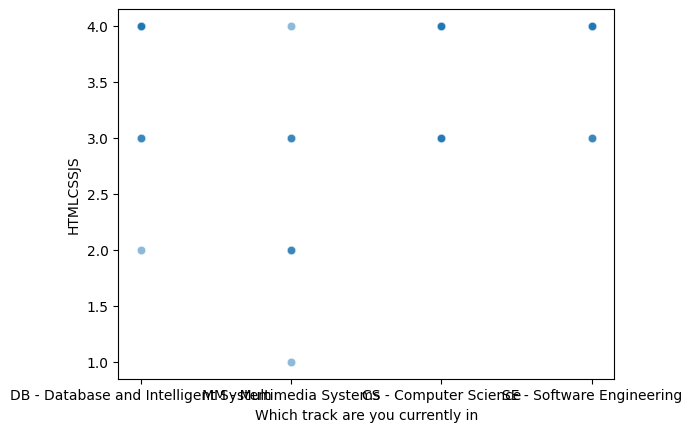

In [ ]:
y = data['HTMLCSSJS']
sns.scatterplot(x=x, y=y, alpha=0.5)

<Axes: xlabel='Which track are you currently in', ylabel='Scikitlearn'>

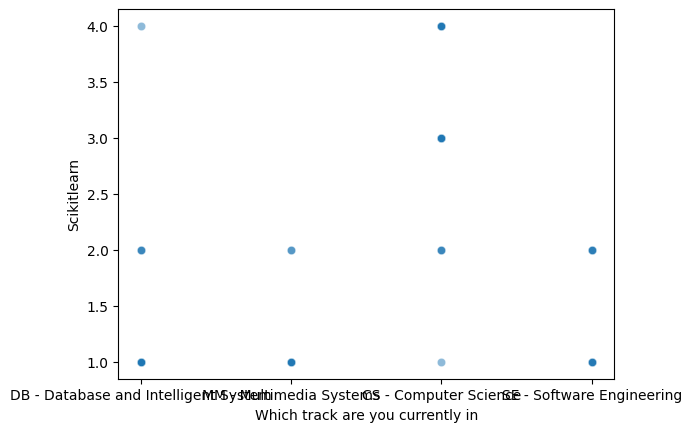

In [ ]:
y = data['Scikitlearn']
sns.scatterplot(x=x, y=y, alpha=0.5)

<Axes: xlabel='Which track are you currently in', ylabel='Git'>

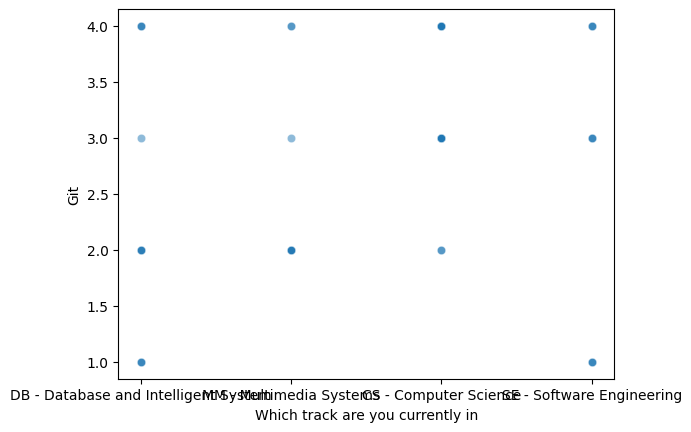

In [ ]:
y = data['Git']
sns.scatterplot(x=x, y=y, alpha=0.5)

<Axes: xlabel='Which track are you currently in', ylabel='Odoo'>

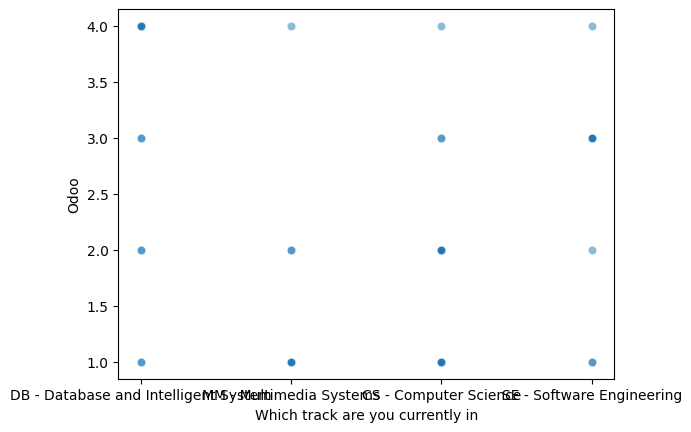

In [ ]:
y = data['Odoo']
sns.scatterplot(x=x, y=y, alpha=0.5)

<Axes: xlabel='Which track are you currently in', ylabel='PowerBI'>

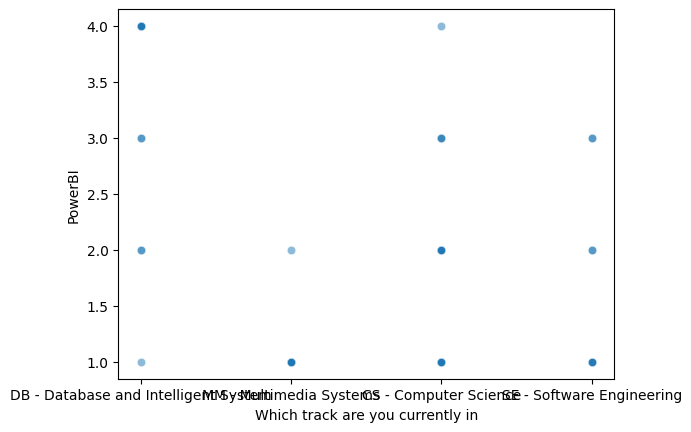

In [ ]:
y = data['PowerBI']
sns.scatterplot(x=x, y=y, alpha=0.5)

<Axes: xlabel='Which track are you currently in', ylabel='NumpyPandas'>

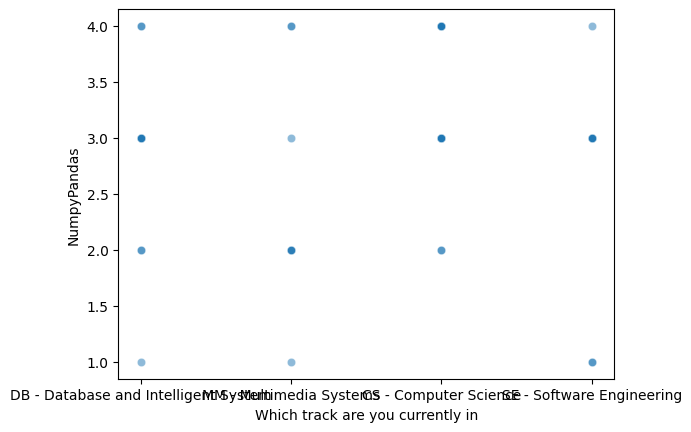

In [ ]:
y = data['NumpyPandas']
sns.scatterplot(x=x, y=y, alpha=0.5)

<Axes: xlabel='Which track are you currently in', ylabel='Cisco Packet Tracer'>

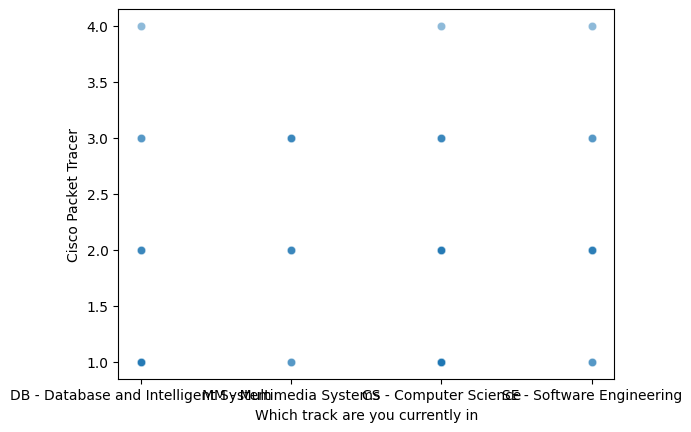

In [ ]:
y = data['Cisco Packet Tracer']
sns.scatterplot(x=x, y=y, alpha=0.5)

<Axes: xlabel='Which track are you currently in', ylabel='Unity'>

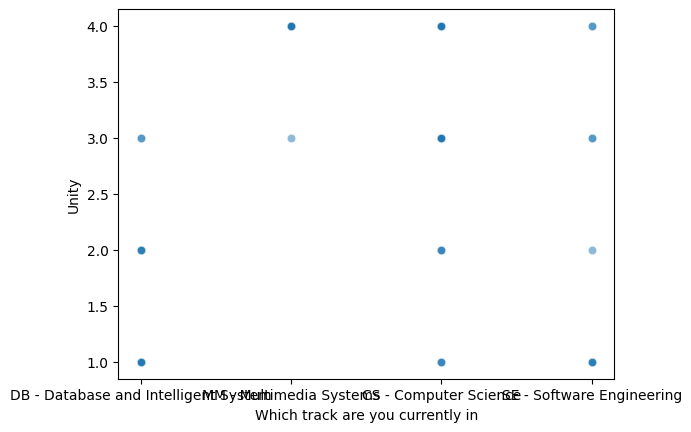

In [ ]:
y = data['Unity']
sns.scatterplot(x=x, y=y, alpha=0.5)

<Axes: xlabel='Which track are you currently in', ylabel='MySQL'>

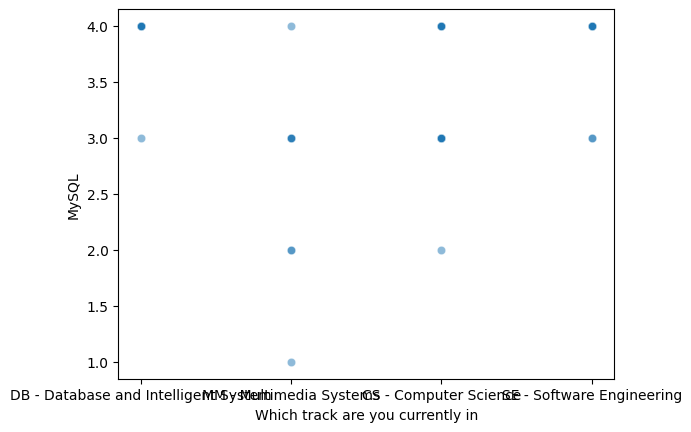

In [ ]:
y = data['MySQL']
sns.scatterplot(x=x, y=y, alpha=0.5)

<Axes: xlabel='Which track are you currently in', ylabel='Blender'>

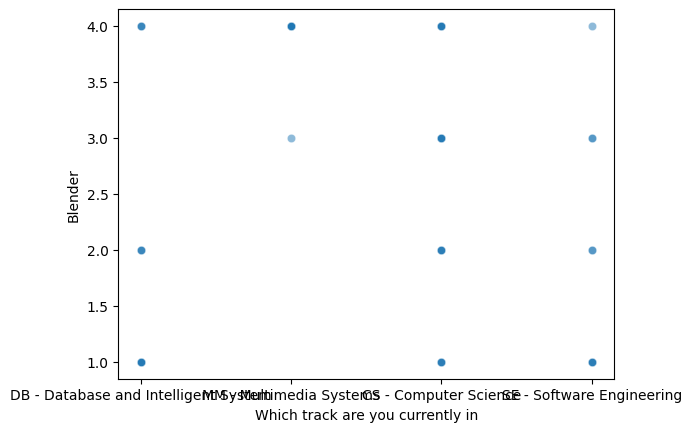

In [ ]:
y = data['Blender']
sns.scatterplot(x=x, y=y, alpha=0.5)

<Axes: xlabel='Which track are you currently in', ylabel='ArduinoRaspberry Pi'>

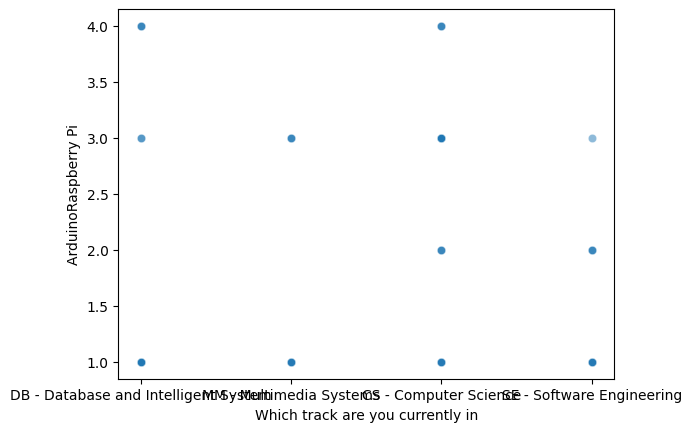

In [ ]:
y = data['ArduinoRaspberry Pi']
sns.scatterplot(x=x, y=y, alpha=0.5)

<Axes: xlabel='Which track are you currently in', ylabel='MongoDB'>

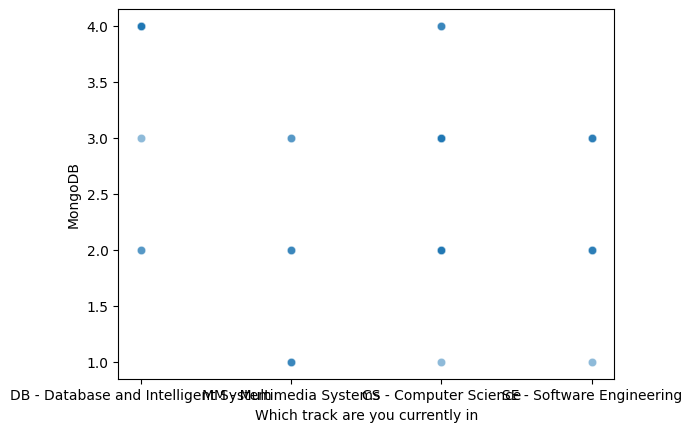

In [ ]:
y = data['MongoDB']
sns.scatterplot(x=x, y=y, alpha=0.5)

<Axes: xlabel='Which track are you currently in', ylabel='Imagine you have a large dataset with millions of customer records What aspects of working with that data most appeal to you'>

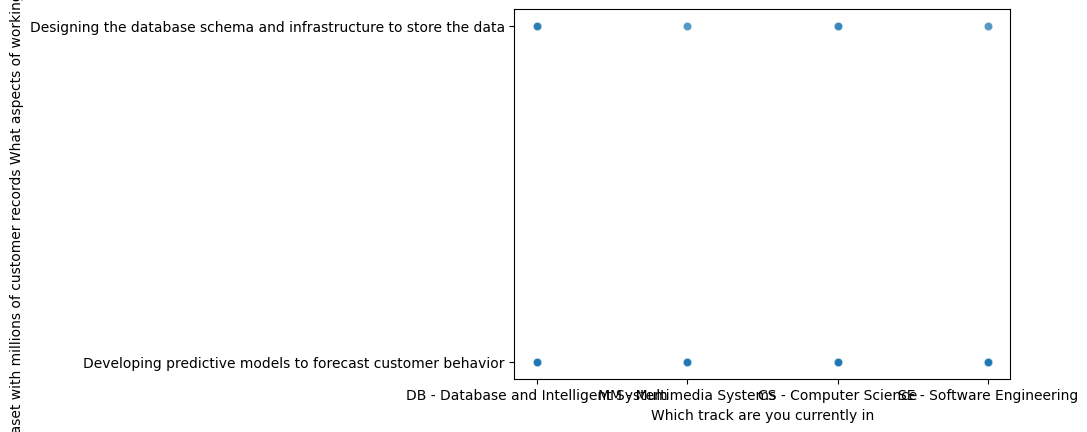

In [ ]:
y = data['Imagine you have a large dataset with millions of customer records What aspects of working with that data most appeal to you']
sns.scatterplot(x=x, y=y, alpha=0.5) # remove this

<Axes: xlabel='Which track are you currently in', ylabel='A healthcare organization has approached your team to create a new digital health application Which of the following would you be most interested to contribute to'>

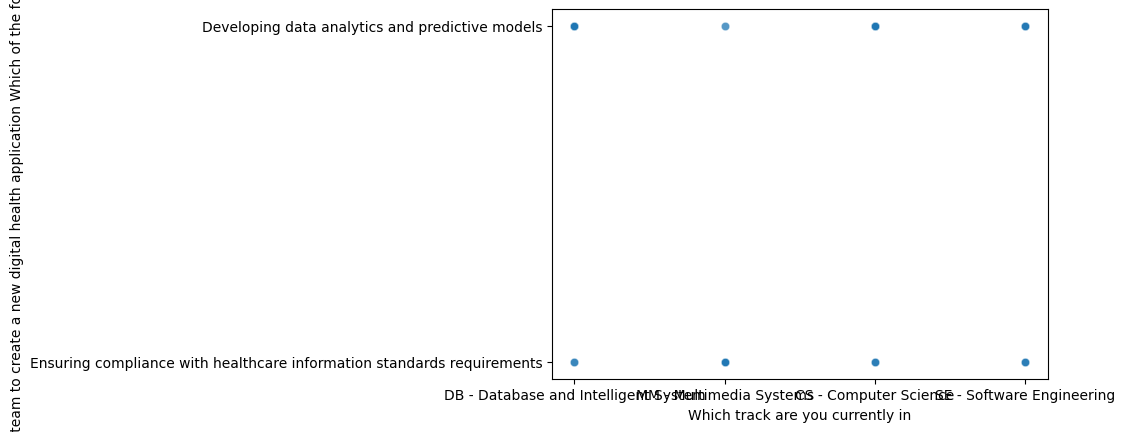

In [ ]:
y = data['A healthcare organization has approached your team to create a new digital health application Which of the following would you be most interested to contribute to']
sns.scatterplot(x=x, y=y, alpha=0.5)

<Axes: xlabel='Which track are you currently in', ylabel='Imagine youre working on a team project Which role would you be most excited to take on'>

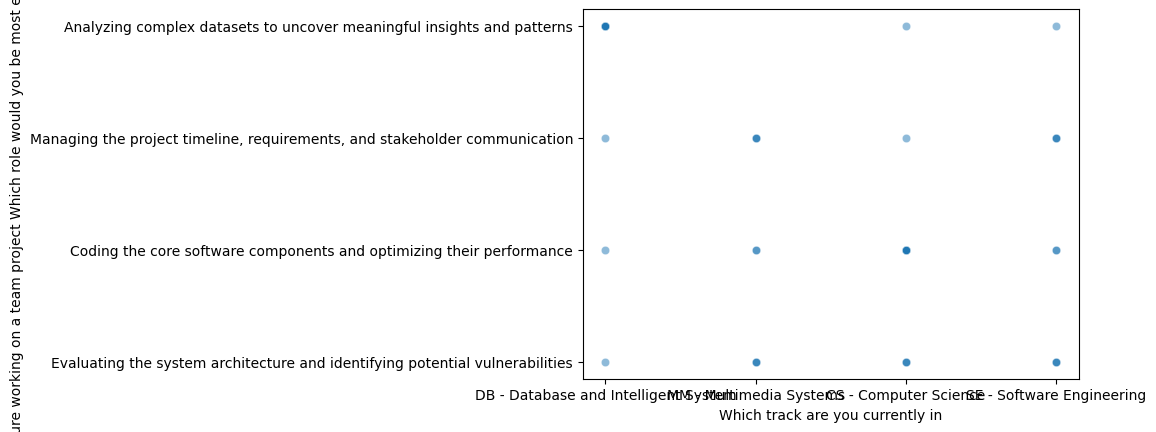

In [ ]:
y = data['Imagine youre working on a team project Which role would you be most excited to take on']
sns.scatterplot(x=x, y=y, alpha=0.5)

<Axes: xlabel='Which track are you currently in', ylabel='Assuming that youre working for a game industry which of the following careers do you most prefer based on your interests and skills'>

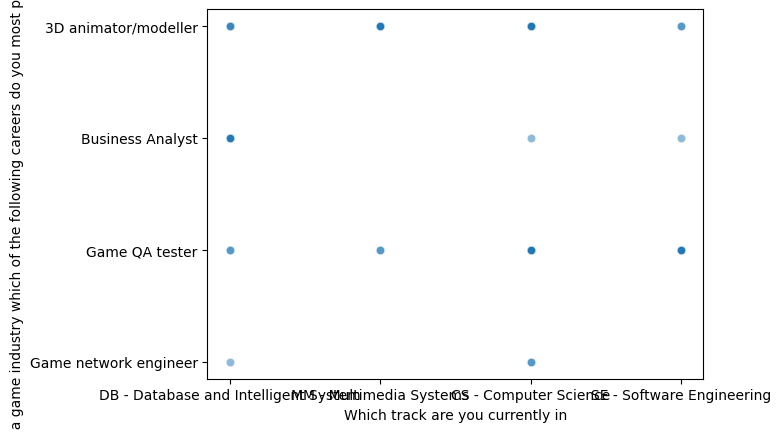

In [ ]:
y = data['Assuming that youre working for a game industry which of the following careers do you most prefer based on your interests and skills']
sns.scatterplot(x=x, y=y, alpha=0.5)

<Axes: xlabel='Which track are you currently in', ylabel='A healthcare organization has approached your team to create a new digital health application Which of the following would you be most interested to contribute to2'>

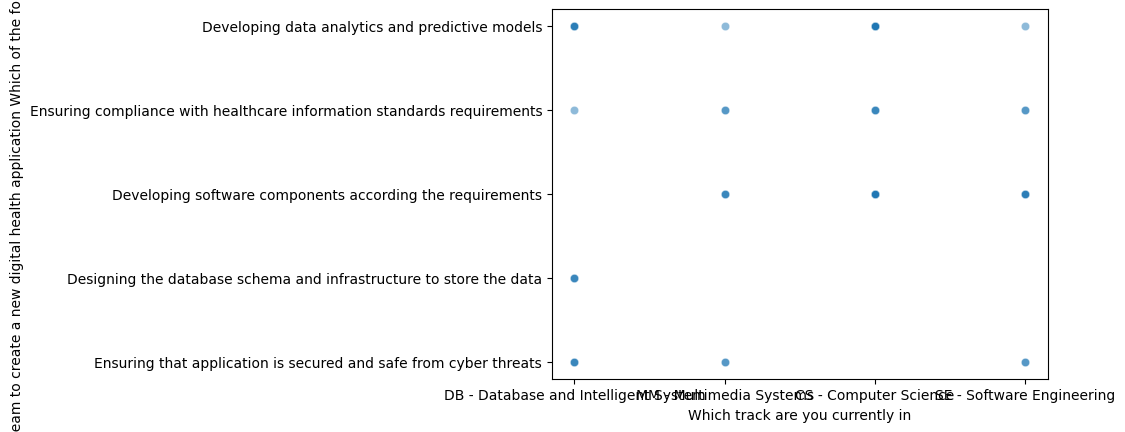

In [ ]:
y = data['A healthcare organization has approached your team to create a new digital health application Which of the following would you be most interested to contribute to2']
sns.scatterplot(x=x, y=y, alpha=0.5)

<Axes: xlabel='Which track are you currently in', ylabel='Which of the following concepts do you prefer to gain understandings from'>

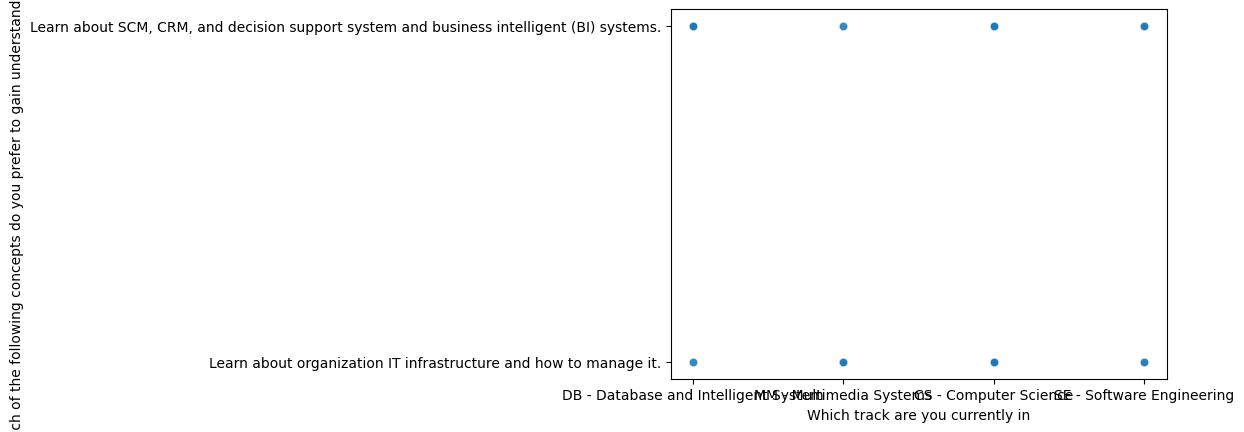

In [ ]:
y = data['Which of the following concepts do you prefer to gain understandings from']
sns.scatterplot(x=x, y=y, alpha=0.5)

<Axes: xlabel='Which track are you currently in', ylabel='Creating interactive 3D animations and simulations to engage students'>

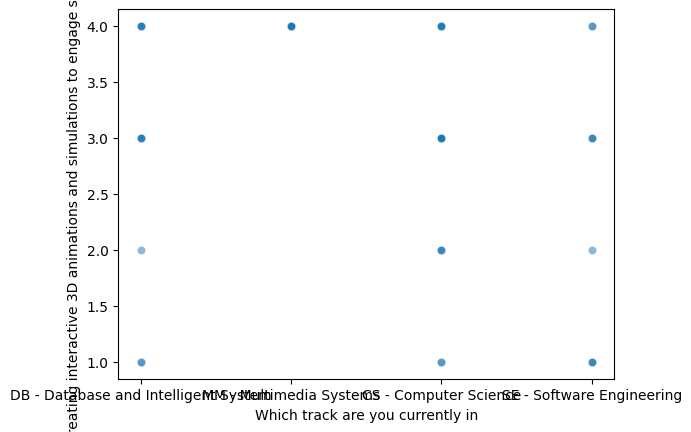

In [ ]:
y = data['Creating interactive 3D animations and simulations to engage students']
sns.scatterplot(x=x, y=y, alpha=0.5)

<Axes: xlabel='Which track are you currently in', ylabel='Implementing network infrastructure and communication protocols for content delivery'>

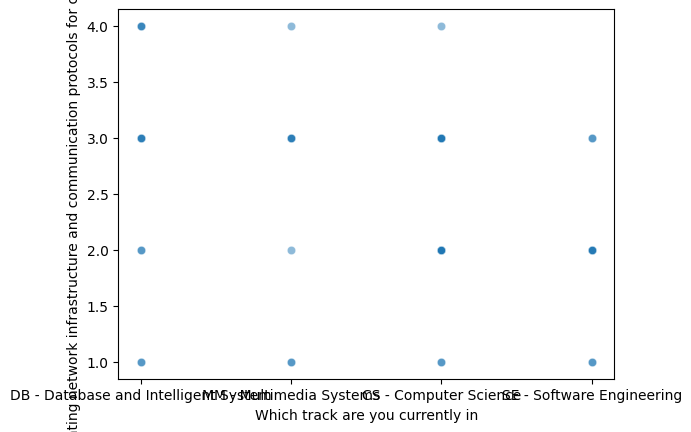

In [ ]:
y = data['Implementing network infrastructure and communication protocols for content delivery']
sns.scatterplot(x=x, y=y, alpha=0.5)

<Axes: xlabel='Which track are you currently in', ylabel='Integrating intelligent techniques for personalized learning and adaptive content delivery'>

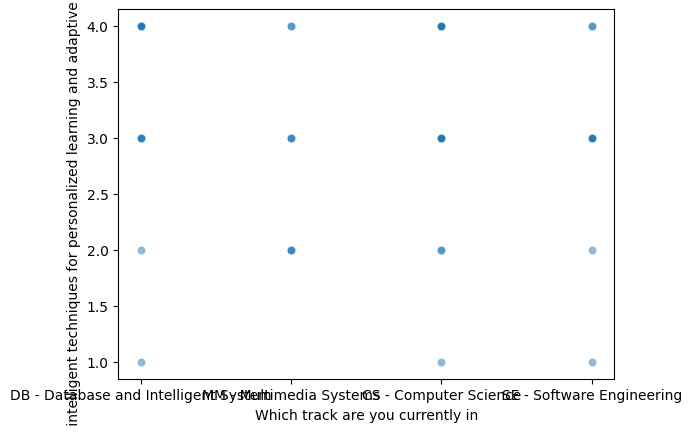

In [ ]:
y = data['Integrating intelligent techniques for personalized learning and adaptive content delivery']
sns.scatterplot(x=x, y=y, alpha=0.5)

<Axes: xlabel='Which track are you currently in', ylabel='Learn about different ML models and implement them using numpypandas scikitlearn or tensorflow libraries to tune the model'>

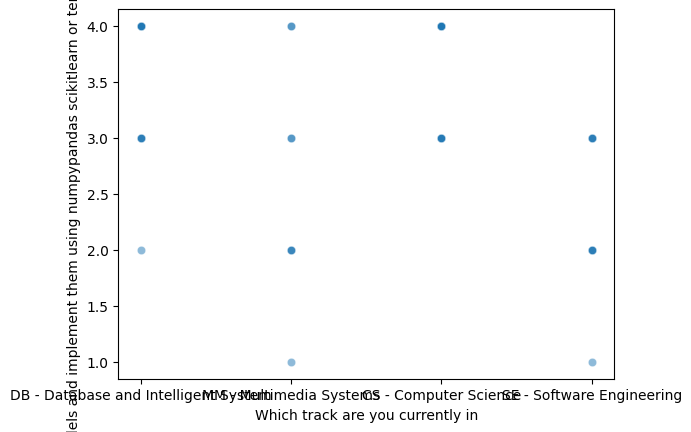

In [ ]:
y = data['Learn about different ML models and implement them using numpypandas scikitlearn or tensorflow libraries to tune the model']
sns.scatterplot(x=x, y=y, alpha=0.5)

<Axes: xlabel='Which track are you currently in', ylabel='Learn about different advanced data structures and algorithms eg graph tree and understand them using mathematical analysis'>

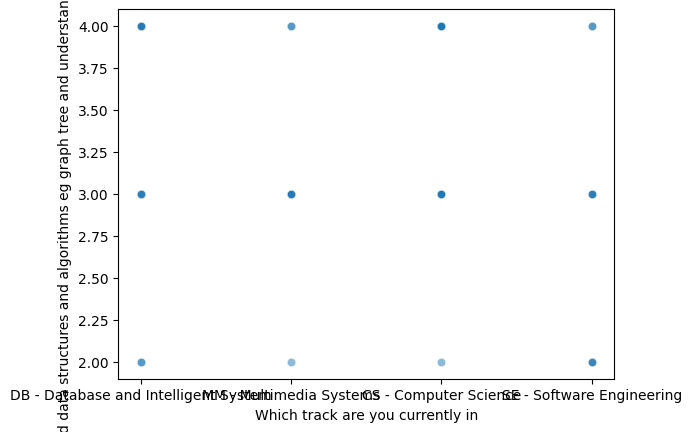

In [ ]:
y = data['Learn about different advanced data structures and algorithms eg graph tree and understand them using mathematical analysis']
sns.scatterplot(x=x, y=y, alpha=0.5)

<Axes: xlabel='Which track are you currently in', ylabel='Learn about different techniques to create a handson database project from analyzing requirements designing and implementing database system'>

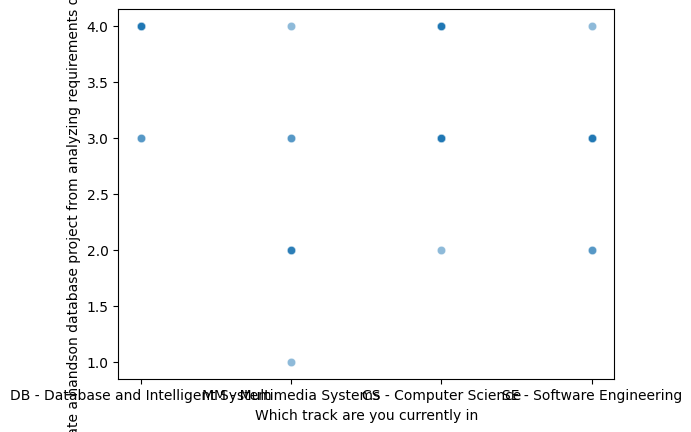

In [ ]:
y = data['Learn about different techniques to create a handson database project from analyzing requirements designing and implementing database system']
sns.scatterplot(x=x, y=y, alpha=0.5)

<Axes: xlabel='Which track are you currently in', ylabel='Learn about various techniques used to test software to ensure correctness and quality'>

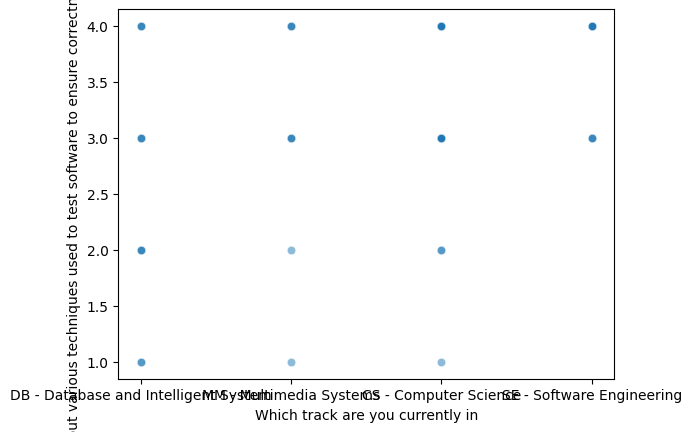

In [ ]:
y = data['Learn about various techniques used to test software to ensure correctness and quality']
sns.scatterplot(x=x, y=y, alpha=0.5)

<Axes: xlabel='Which track are you currently in', ylabel='Learn about SCM CRM and decision support system and business intelligent BI systems'>

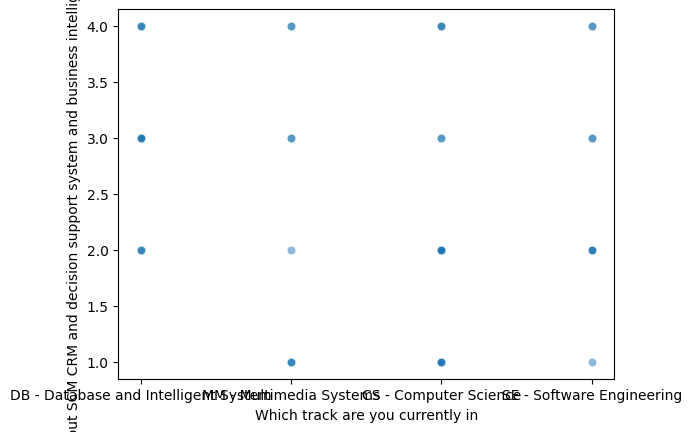

In [ ]:
y = data['Learn about SCM CRM and decision support system and business intelligent BI systems']
sns.scatterplot(x=x, y=y, alpha=0.5)

<Axes: xlabel='Which track are you currently in', ylabel='Learn about healthcare information standards to allows communication of electronic health records among different facilities'>

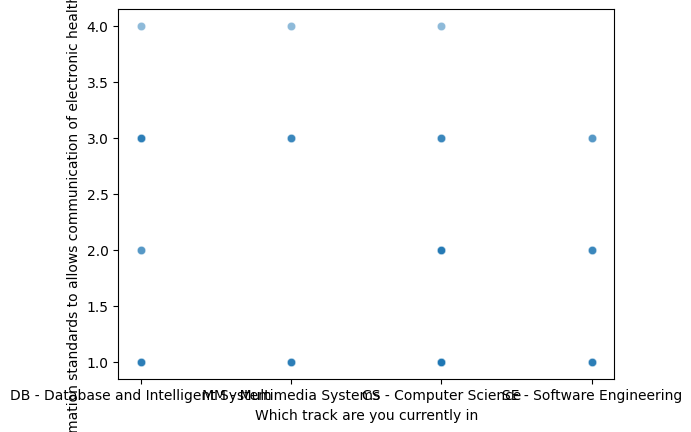

In [ ]:
y = data['Learn about healthcare information standards to allows communication of electronic health records among different facilities']
sns.scatterplot(x=x, y=y, alpha=0.5)

<Axes: xlabel='Which track are you currently in', ylabel='Implement lowlevel 3D graphics to simulate vertices modelviewprojection matrix and lightning using OpenGL with CC language'>

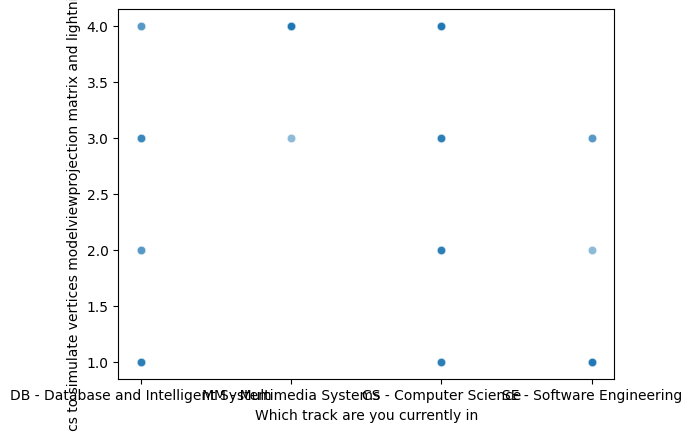

In [ ]:
y = data['Implement lowlevel 3D graphics to simulate vertices modelviewprojection matrix and lightning using OpenGL with CC language']
sns.scatterplot(x=x, y=y, alpha=0.5)

<Axes: xlabel='Which track are you currently in', ylabel='Implement network infrastructure and communication protocols for certain types of systems'>

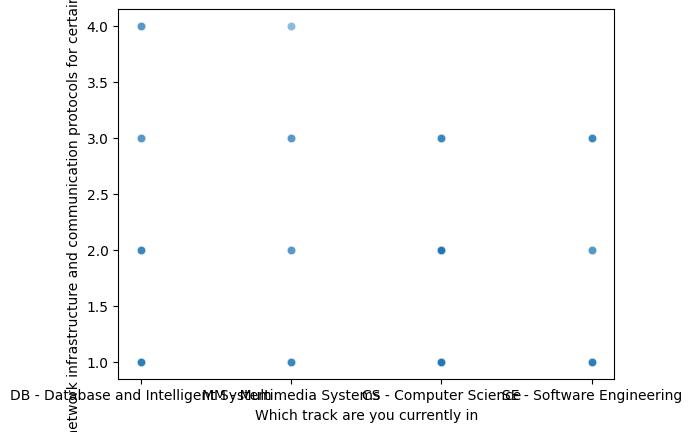

In [ ]:
y = data['Implement network infrastructure and communication protocols for certain types of systems']
sns.scatterplot(x=x, y=y, alpha=0.5)

<Axes: xlabel='Which track are you currently in', ylabel='Implement program that controls microcontroller eg Arduino and Raspberry Pi to perform automated tasks according to temperature and light sensors via network'>

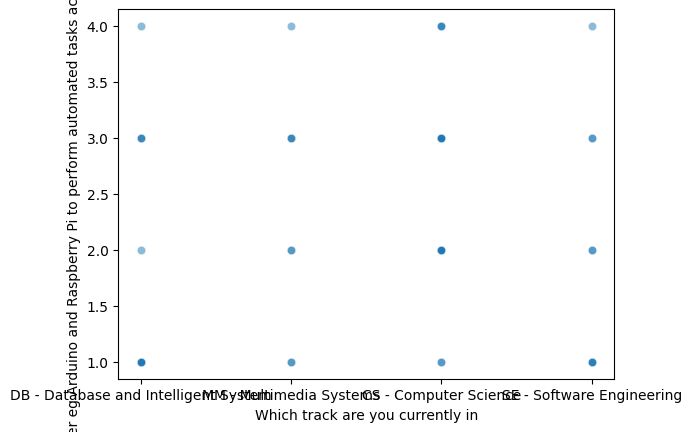

In [ ]:
y = data['Implement program that controls microcontroller eg Arduino and Raspberry Pi to perform automated tasks according to temperature and light sensors via network']
sns.scatterplot(x=x, y=y, alpha=0.5)

<Axes: xlabel='Which track are you currently in', ylabel='Analyzing the business requirements and defining the system architecture'>

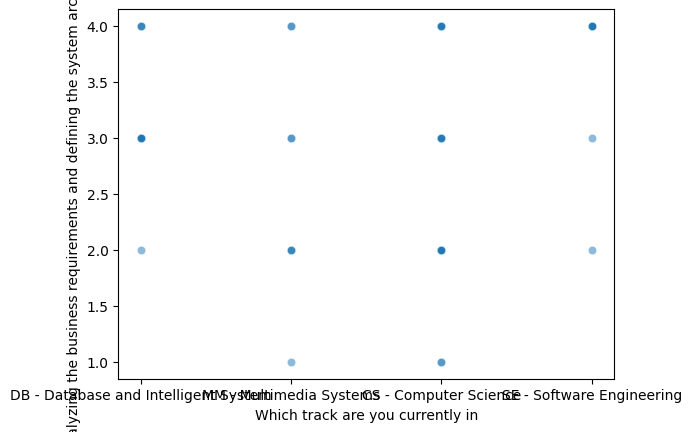

In [ ]:
y = data['Analyzing the business requirements and defining the system architecture']
sns.scatterplot(x=x, y=y, alpha=0.5)

<Axes: xlabel='Which track are you currently in', ylabel='Implementing ecommerce and business intelligence features for monetization and analytics'>

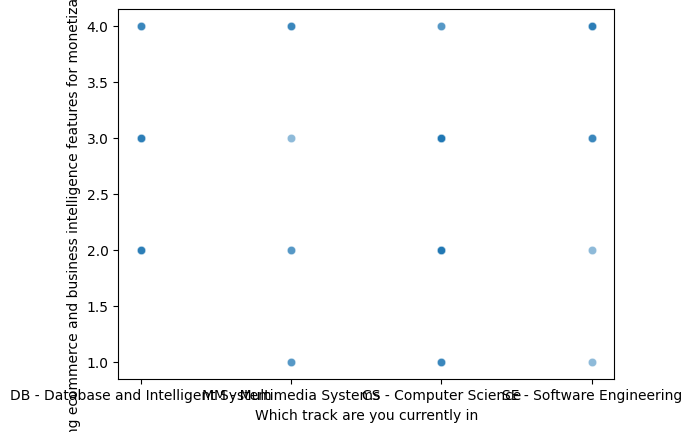

In [ ]:
y = data['Implementing ecommerce and business intelligence features for monetization and analytics']
sns.scatterplot(x=x, y=y, alpha=0.5)

<Axes: xlabel='Which track are you currently in', ylabel='Implementing efficient algorithms and data structures to optimize the systems performance'>

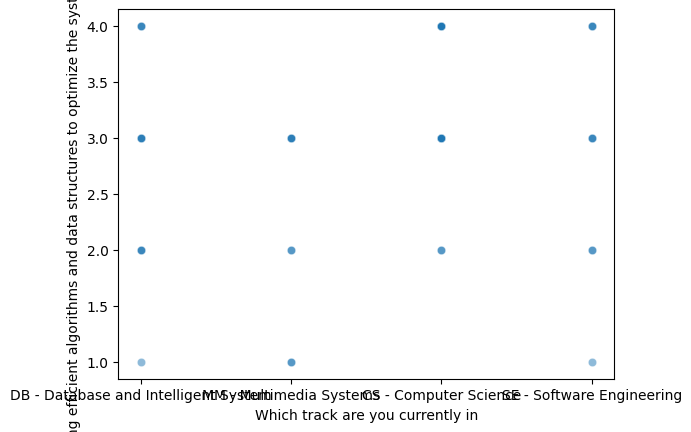

In [ ]:
y = data['Implementing efficient algorithms and data structures to optimize the systems performance']
sns.scatterplot(x=x, y=y, alpha=0.5)

<Axes: xlabel='Which track are you currently in', ylabel='Ensuring the systems security and reliability through testing and quality assurance'>

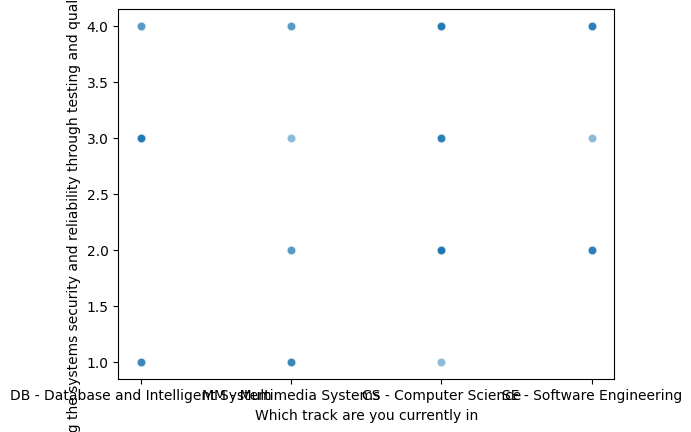

In [ ]:
y = data['Ensuring the systems security and reliability through testing and quality assurance']
sns.scatterplot(x=x, y=y, alpha=0.5)

<Axes: xlabel='Which track are you currently in', ylabel='Integrating the system with databases business intelligence tools and data analytics'>

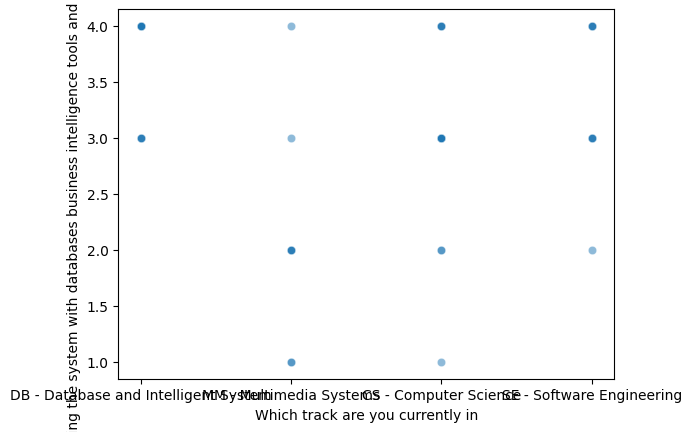

In [ ]:
y = data['Integrating the system with databases business intelligence tools and data analytics']
sns.scatterplot(x=x, y=y, alpha=0.5)

<Axes: xlabel='Which track are you currently in', ylabel='FullStack Web Developer Design and develop both frontend and backend components of web  applications implement efficient algorithms and data structures ensure  software quality through testi'>

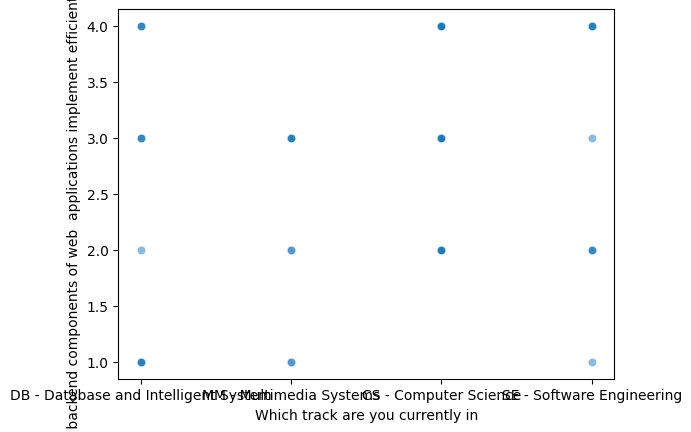

In [ ]:
y = data['FullStack Web Developer Design and develop both frontend and backend components of web  applications implement efficient algorithms and data structures ensure  software quality through testi']
sns.scatterplot(x=x, y=y, alpha=0.5)

<Axes: xlabel='Which track are you currently in', ylabel='Data Engineer Design and manage database systems implement data warehousing  and data mining solutions develop intelligent systems for pattern  recognition and knowledge management'>

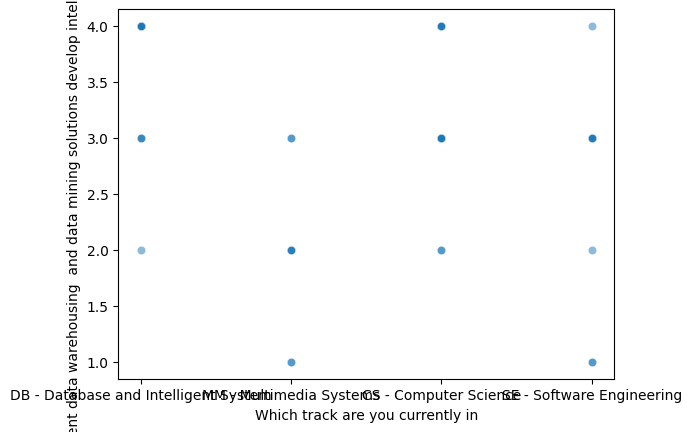

In [ ]:
y = data['Data Engineer Design and manage database systems implement data warehousing  and data mining solutions develop intelligent systems for pattern  recognition and knowledge management']
sns.scatterplot(x=x, y=y, alpha=0.5)

<Axes: xlabel='Which track are you currently in', ylabel='Network Administrator Configure and maintain computer networks manage network  infrastructure and security troubleshoot network issues develop  network automation scripts'>

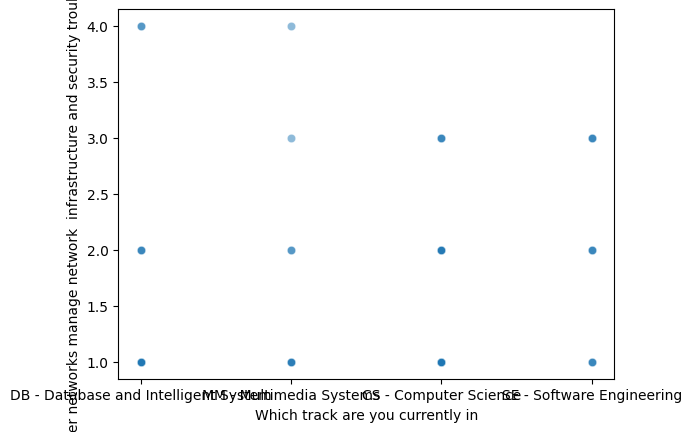

In [ ]:
y = data['Network Administrator Configure and maintain computer networks manage network  infrastructure and security troubleshoot network issues develop  network automation scripts']
sns.scatterplot(x=x, y=y, alpha=0.5)

<Axes: xlabel='Which track are you currently in', ylabel='3D Animator Create 3D animations and visual effects for movies games or  multimedia applications develop computer graphics and character  animations optimize rendering performance'>

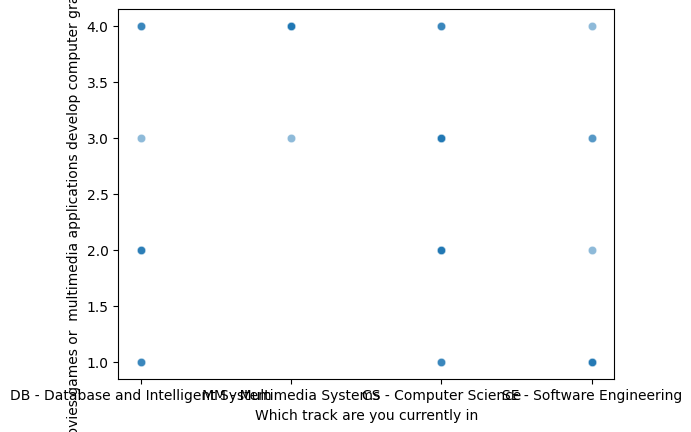

In [ ]:
y = data['3D Animator Create 3D animations and visual effects for movies games or  multimedia applications develop computer graphics and character  animations optimize rendering performance']
sns.scatterplot(x=x, y=y, alpha=0.5)

<Axes: xlabel='Which track are you currently in', ylabel='Ensuring the systems security and reliability through testing and quality assurance'>

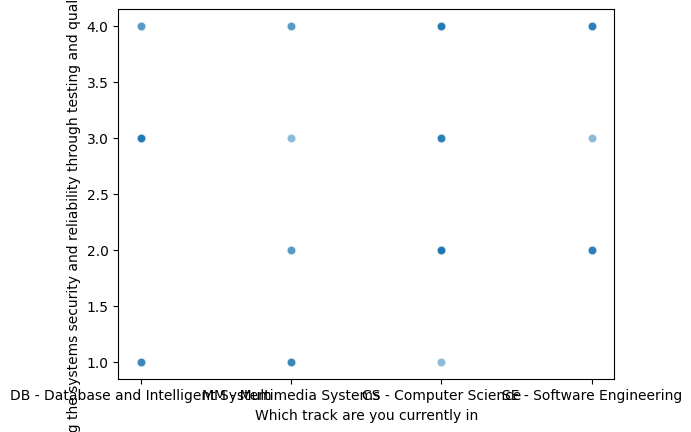

In [ ]:
y = data['Ensuring the systems security and reliability through testing and quality assurance']
sns.scatterplot(x=x, y=y, alpha=0.5)

<Axes: xlabel='Which track are you currently in', ylabel='Business Intelligence Consultant Analyze business processes and requirements implement ebusiness  platforms and customer relationship management systems develop  decision support and business'>

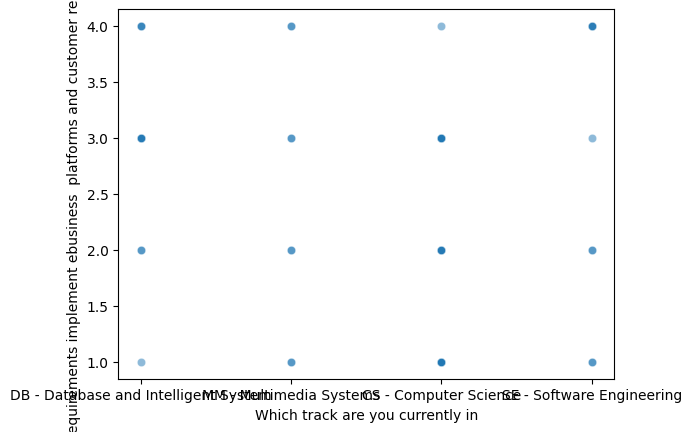

In [ ]:
y = data['Business Intelligence Consultant Analyze business processes and requirements implement ebusiness  platforms and customer relationship management systems develop  decision support and business']
sns.scatterplot(x=x, y=y, alpha=0.5)

<Axes: xlabel='Which track are you currently in', ylabel='Healthcare Information Systems Specialist Develop and implement healthcare information systems integrate  electronic health records and clinical information systems ensure  compliance with heal'>

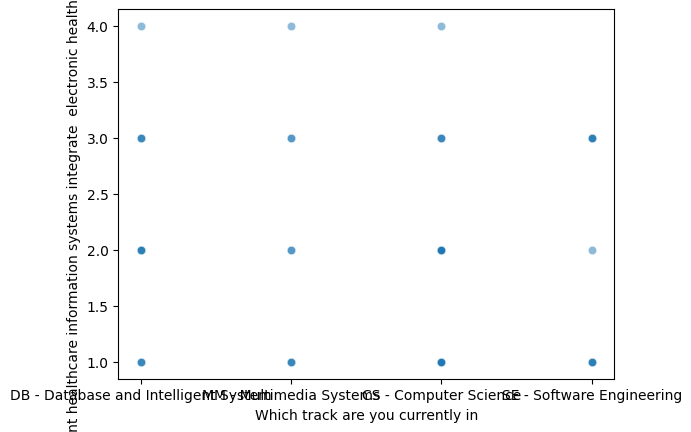

In [ ]:
y = data['Healthcare Information Systems Specialist Develop and implement healthcare information systems integrate  electronic health records and clinical information systems ensure  compliance with heal']
sns.scatterplot(x=x, y=y, alpha=0.5)

<Axes: xlabel='Which track are you currently in', ylabel='IT Project Manager Manage IT projects and resources within an organization analyze  and design business processes implement decision support and business  intelligence solutions ensure project'>

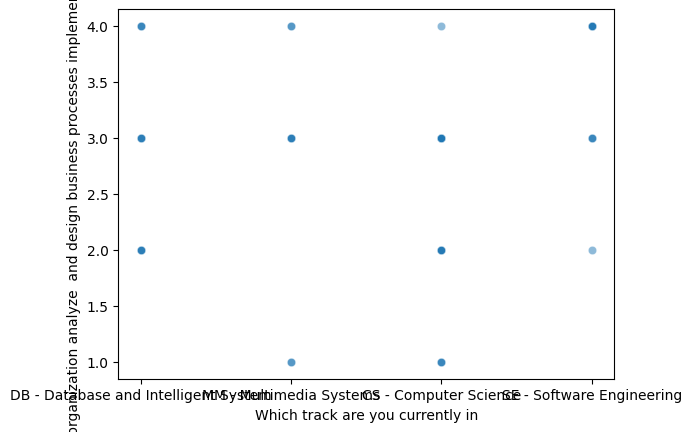

In [ ]:
y = data['IT Project Manager Manage IT projects and resources within an organization analyze  and design business processes implement decision support and business  intelligence solutions ensure project']
sns.scatterplot(x=x, y=y, alpha=0.5)

<Axes: xlabel='Which track are you currently in', ylabel='Machine Learning Engineer Develop and deploy machine learning models implement efficient  algorithms and data structures apply computer science theories to solve  complex problems work on mach'>

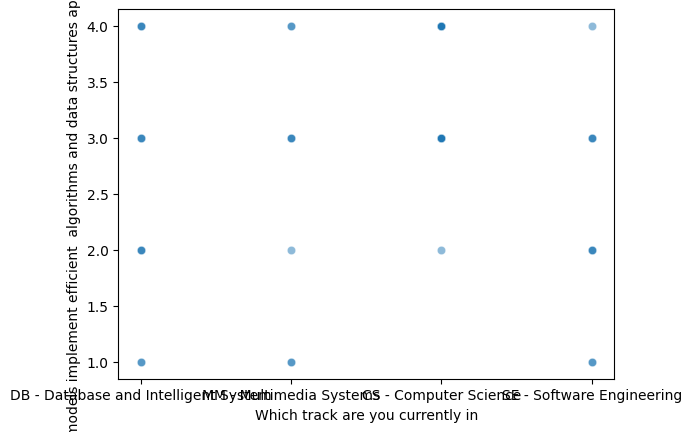

In [ ]:
y = data['Machine Learning Engineer Develop and deploy machine learning models implement efficient  algorithms and data structures apply computer science theories to solve  complex problems work on mach']
sns.scatterplot(x=x, y=y, alpha=0.5)

<Axes: xlabel='Which track are you currently in', ylabel='track_rank1'>

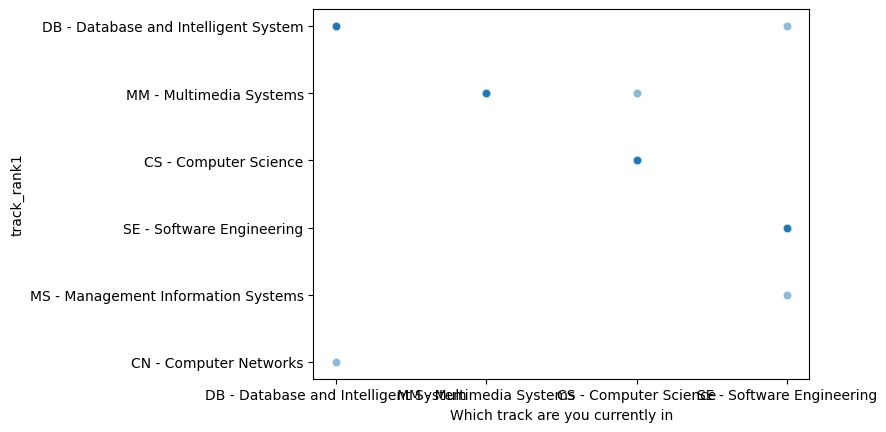

In [ ]:
y = data['track_rank1']
sns.scatterplot(x=x, y=y, alpha=0.5)

<Axes: xlabel='Which track are you currently in', ylabel='track_rank2'>

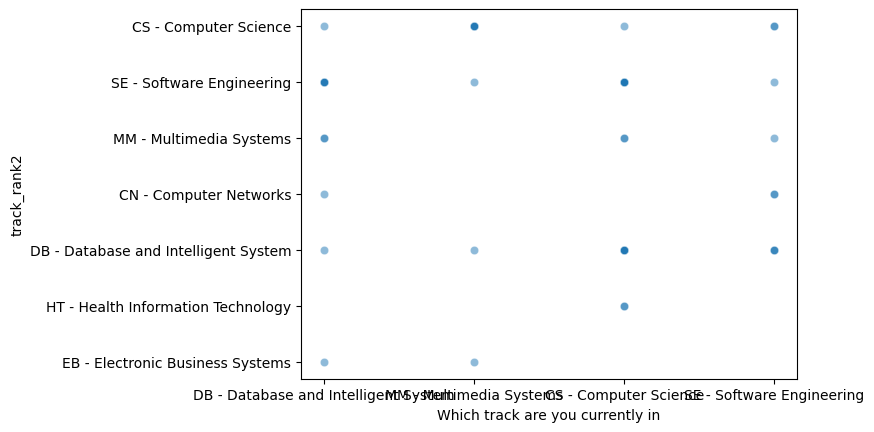

In [ ]:
y = data['track_rank2']
sns.scatterplot(x=x, y=y, alpha=0.5)

<Axes: xlabel='Which track are you currently in', ylabel='track_rank3'>

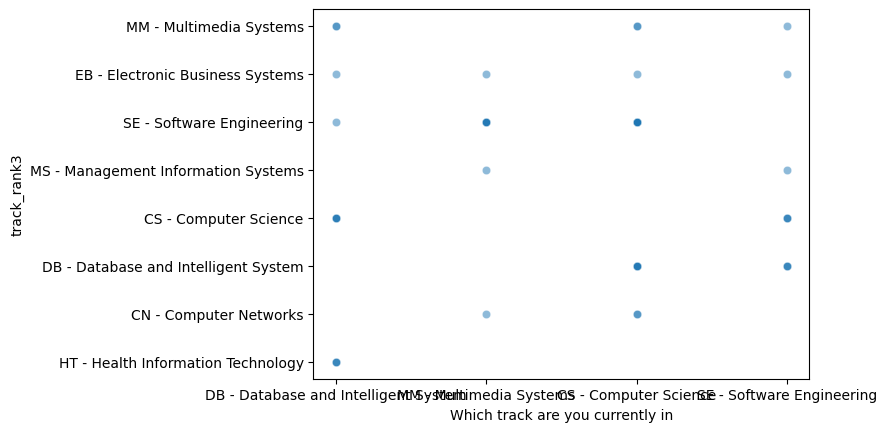

In [ ]:
y = data['track_rank3']
sns.scatterplot(x=x, y=y, alpha=0.5)

<Axes: xlabel='Which track are you currently in', ylabel='track_rank4'>

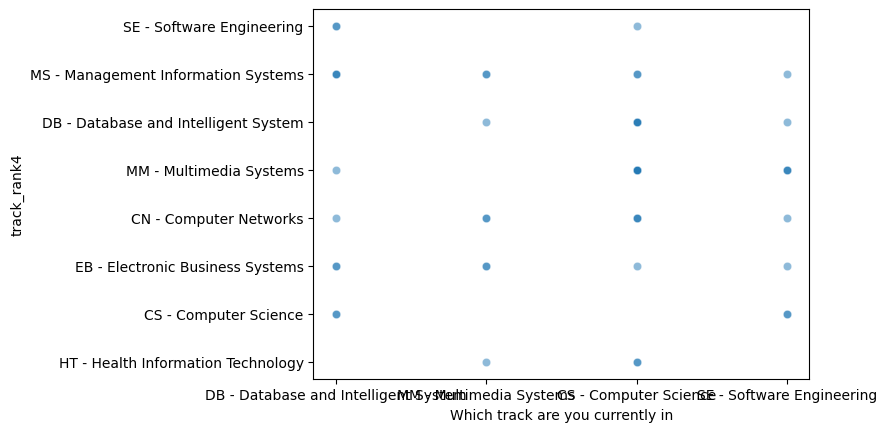

In [ ]:
y = data['track_rank4']
sns.scatterplot(x=x, y=y, alpha=0.5)

<Axes: xlabel='Which track are you currently in', ylabel='track_rank5'>

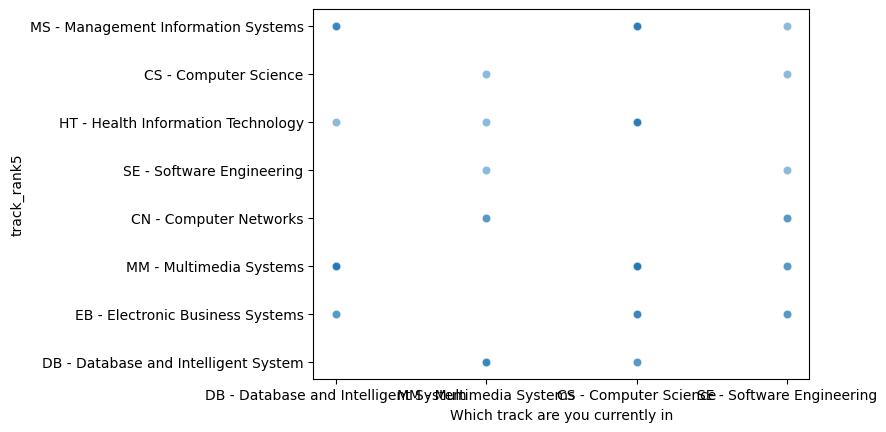

In [ ]:
y = data['track_rank5']
sns.scatterplot(x=x, y=y, alpha=0.5)

<Axes: xlabel='Which track are you currently in', ylabel='track_rank6'>

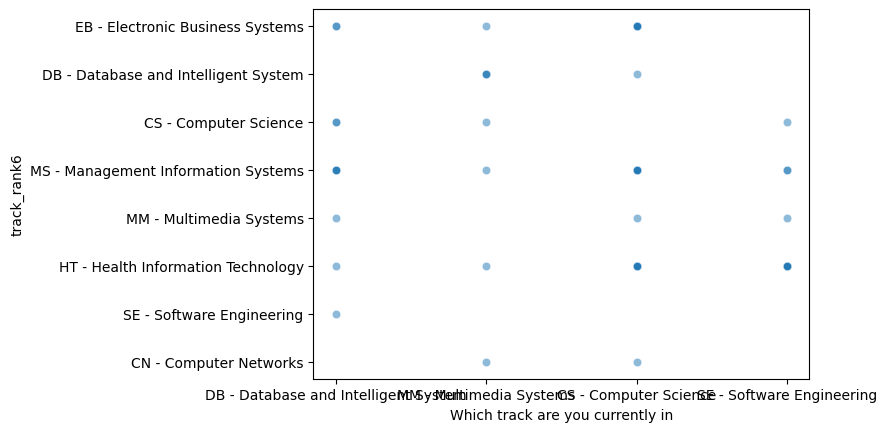

In [ ]:
y = data['track_rank6']
sns.scatterplot(x=x, y=y, alpha=0.5)

<Axes: xlabel='Which track are you currently in', ylabel='track_rank7'>

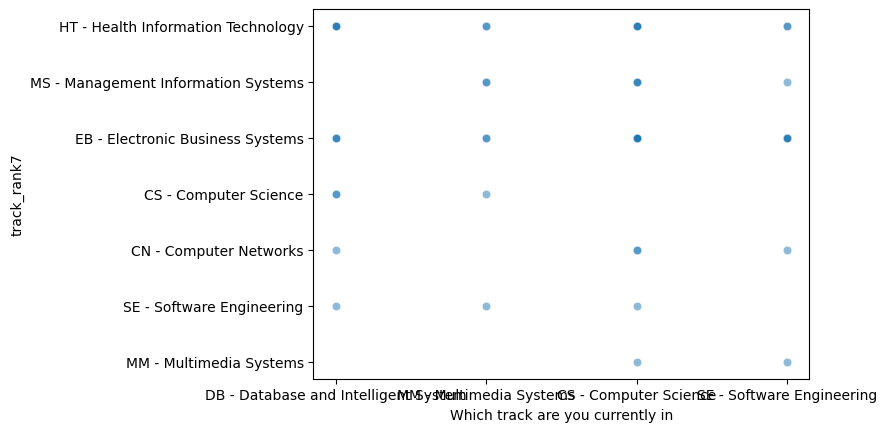

In [ ]:
y = data['track_rank7']
sns.scatterplot(x=x, y=y, alpha=0.5)

<Axes: xlabel='Which track are you currently in', ylabel='track_rank8'>

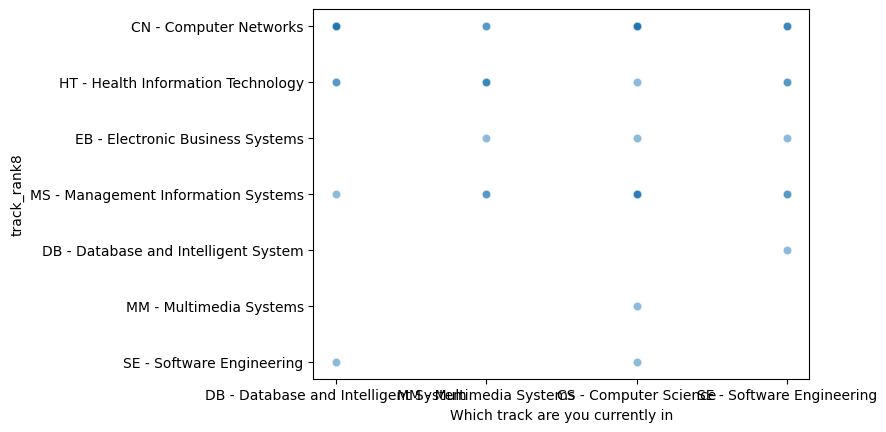

In [ ]:
y = data['track_rank8']
sns.scatterplot(x=x, y=y, alpha=0.5)

<Axes: xlabel='Which track are you currently in', ylabel='subj_rank1'>

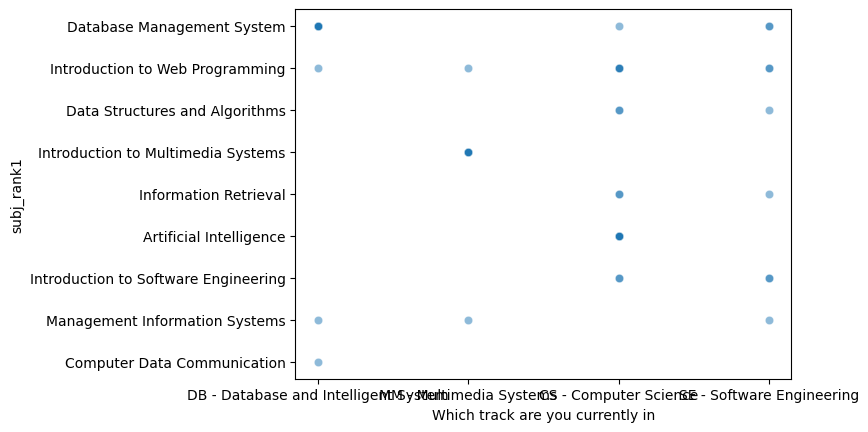

In [ ]:
y = data['subj_rank1']
sns.scatterplot(x=x, y=y, alpha=0.5)

<Axes: xlabel='Which track are you currently in', ylabel='subj_rank2'>

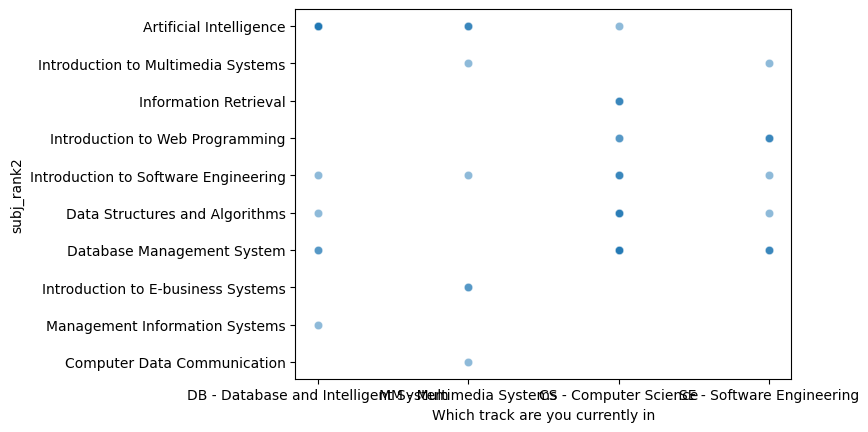

In [ ]:
y = data['subj_rank2']
sns.scatterplot(x=x, y=y, alpha=0.5)

<Axes: xlabel='Which track are you currently in', ylabel='subj_rank2'>

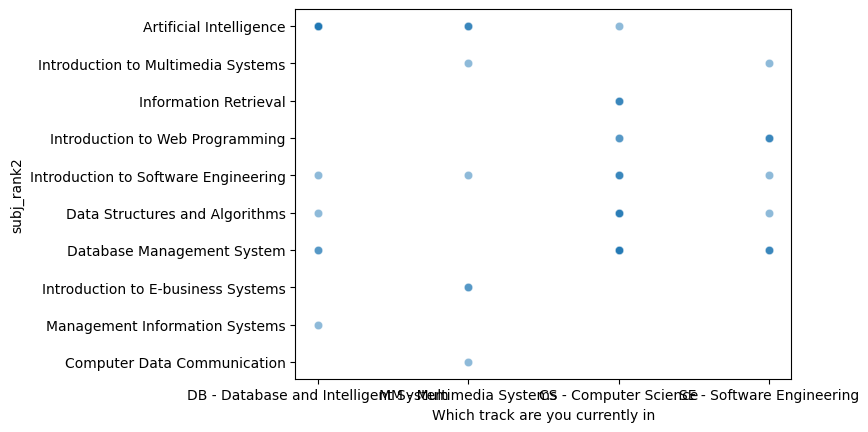

In [ ]:
y = data['subj_rank2']
sns.scatterplot(x=x, y=y, alpha=0.5)

<Axes: xlabel='Which track are you currently in', ylabel='subj_rank3'>

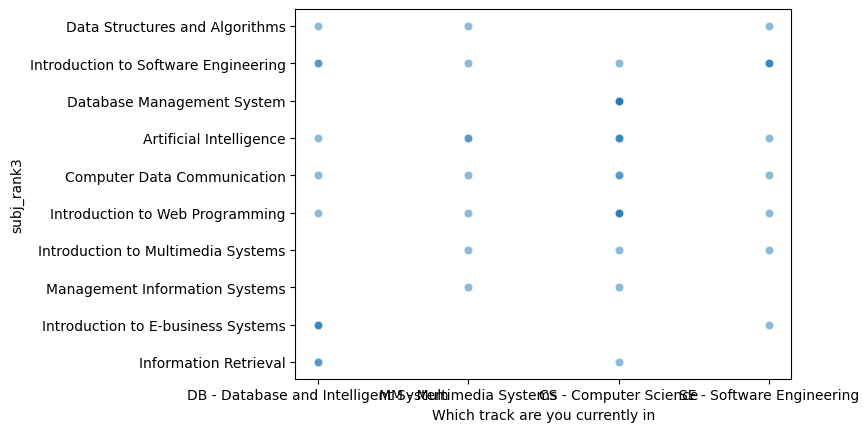

In [ ]:
y = data['subj_rank3']
sns.scatterplot(x=x, y=y, alpha=0.5)

<Axes: xlabel='Which track are you currently in', ylabel='subj_rank4'>

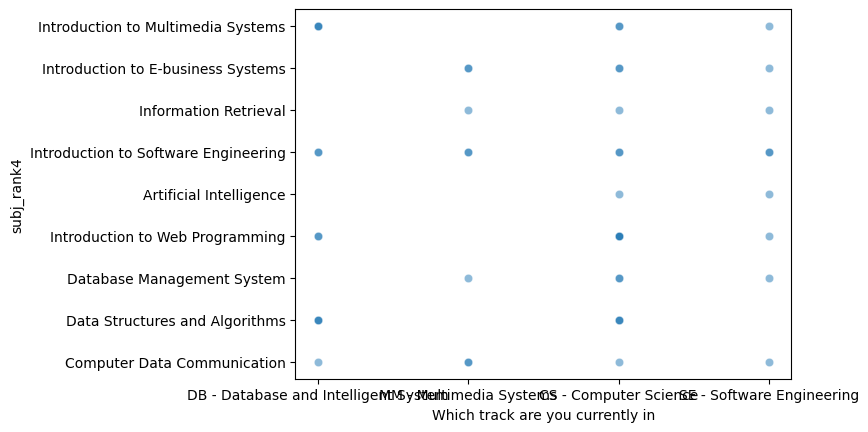

In [ ]:
y = data['subj_rank4']
sns.scatterplot(x=x, y=y, alpha=0.5)

<Axes: xlabel='Which track are you currently in', ylabel='subj_rank5'>

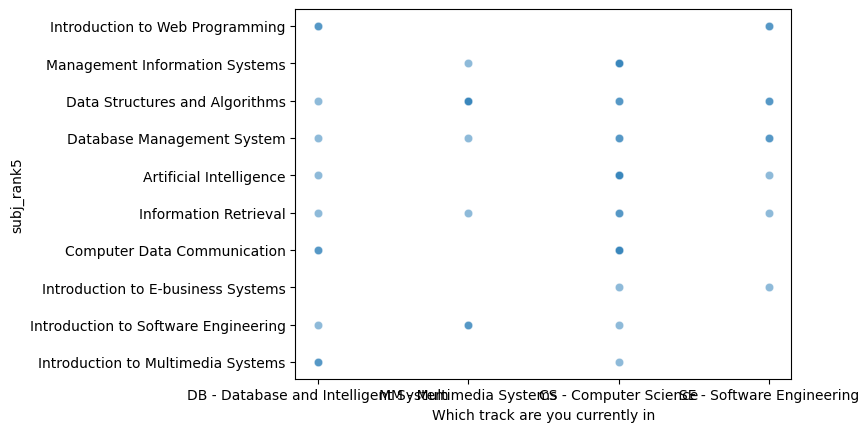

In [ ]:
y = data['subj_rank5']
sns.scatterplot(x=x, y=y, alpha=0.5)

<Axes: xlabel='Which track are you currently in', ylabel='subj_rank6'>

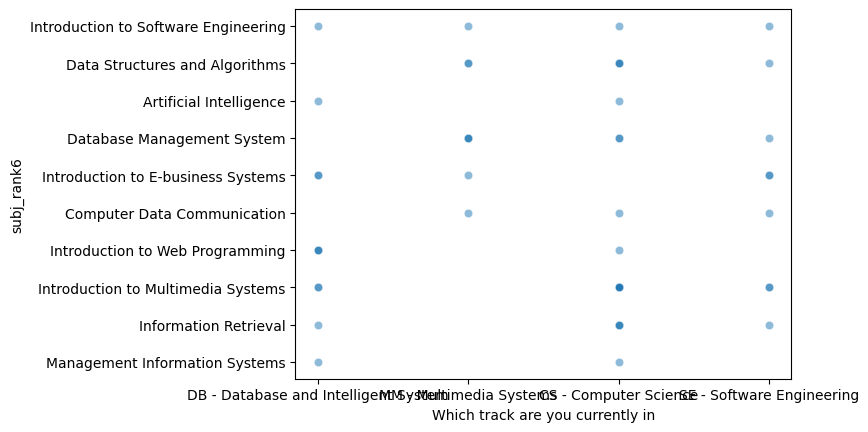

In [ ]:
y = data['subj_rank6']
sns.scatterplot(x=x, y=y, alpha=0.5)

<Axes: xlabel='Which track are you currently in', ylabel='subj_rank7'>

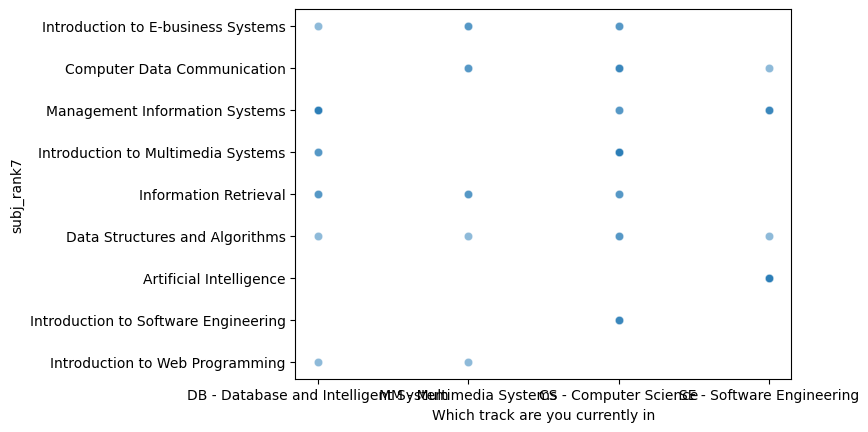

In [ ]:
y = data['subj_rank7']
sns.scatterplot(x=x, y=y, alpha=0.5)

<Axes: xlabel='Which track are you currently in', ylabel='subj_rank8'>

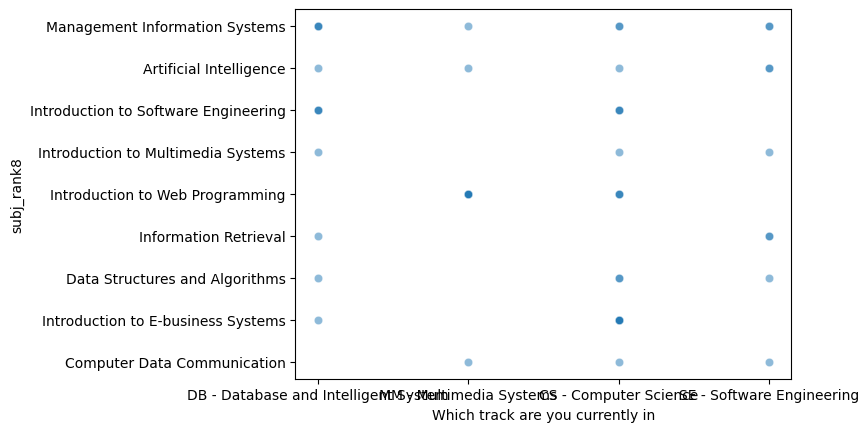

In [ ]:
y = data['subj_rank8']
sns.scatterplot(x=x, y=y, alpha=0.5)

## Feature scores from random forrest

### Encoding data

In [ ]:
import copy

encode_data = copy.deepcopy(data)
for column in data.columns:
  le = preprocessing.LabelEncoder()
  encode_data[column] = le.fit_transform(data[column])
  le.fit(encode_data[column])
  le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
  pprint(le_name_mapping)

{0: 0, 1: 1, 2: 2, 3: 3}
{0: 0, 1: 1, 2: 2, 3: 3}
{0: 0, 1: 1, 2: 2, 3: 3}
{0: 0, 1: 1, 2: 2, 3: 3}
{0: 0, 1: 1, 2: 2, 3: 3}
{0: 0, 1: 1, 2: 2, 3: 3}
{0: 0, 1: 1, 2: 2, 3: 3}
{0: 0, 1: 1, 2: 2, 3: 3}
{0: 0, 1: 1, 2: 2, 3: 3}
{0: 0, 1: 1, 2: 2, 3: 3}
{0: 0, 1: 1, 2: 2, 3: 3}
{0: 0, 1: 1, 2: 2, 3: 3}
{0: 0, 1: 1, 2: 2, 3: 3}
{0: 0, 1: 1}
{0: 0, 1: 1}
{0: 0, 1: 1, 2: 2, 3: 3}
{0: 0, 1: 1, 2: 2, 3: 3}
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}
{0: 0, 1: 1}
{0: 0, 1: 1, 2: 2, 3: 3}
{0: 0, 1: 1, 2: 2, 3: 3}
{0: 0, 1: 1, 2: 2, 3: 3}
{0: 0, 1: 1, 2: 2, 3: 3}
{0: 0, 1: 1, 2: 2, 3: 3}
{0: 0, 1: 1, 2: 2}
{0: 0, 1: 1, 2: 2, 3: 3}
{0: 0, 1: 1, 2: 2, 3: 3}
{0: 0, 1: 1, 2: 2, 3: 3}
{0: 0, 1: 1, 2: 2, 3: 3}
{0: 0, 1: 1, 2: 2, 3: 3}
{0: 0, 1: 1, 2: 2, 3: 3}
{0: 0, 1: 1, 2: 2, 3: 3}
{0: 0, 1: 1, 2: 2, 3: 3}
{0: 0, 1: 1, 2: 2, 3: 3}
{0: 0, 1: 1, 2: 2, 3: 3}
{0: 0, 1: 1, 2: 2, 3: 3}
{0: 0, 1: 1, 2: 2, 3: 3}
{0: 0, 1: 1, 2: 2, 3: 3}
{0: 0, 1: 1, 2: 2, 3: 3}
{0: 0, 1: 1, 2: 2, 3: 3}
{0: 0, 1: 1, 2: 2, 3: 3}
{0: 0, 1: 1

In [ ]:
X = encode_data.drop(['Which track are you currently in'], axis=1)
y = encode_data['Which track are you currently in']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Random forest

In [ ]:
params = {'n_estimators': 500,    # Number of trees in the forest
    'max_depth': 200,      # Maximum depth of the tree
    'min_samples_split': 3, # Minimum number of samples required to split an internal node
    'min_samples_leaf': 2,  # Minimum number of samples required to be at a leaf node
    'random_state': 42      # Random state for reproducibility
}
# Train a Random Forest Classifier
clf = RandomForestClassifier(**params)

In [ ]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=200, min_samples_leaf=2, min_samples_split=3,
                       n_estimators=500, random_state=42)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7
Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       1.00      0.50      0.67         4
           2       0.50      1.00      0.67         1
           3       0.00      0.00      0.00         1

    accuracy                           0.70        10
   macro avg       0.54      0.62      0.53        10
weighted avg       0.72      0.70      0.65        10



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

In [ ]:
feature_scores

track_rank1                                                                                                                                                                                          0.141412
Scikitlearn                                                                                                                                                                                          0.067119
Imagine youre working on a team project Which role would you be most excited to take on                                                                                                              0.047426
Learn about different ML models and implement them using numpypandas scikitlearn or tensorflow libraries to tune the model                                                                           0.046439
subj_rank1                                                                                                                                                                      

## Selecting features
Keeping only features, we decide to include. Decisions were made based on data from feature selection process and UI design to receive input to predict track ranks.

In [ ]:
data2 = data[['Which track are you currently in', 'Scikitlearn', 'PowerBI', 'Unity',
       'MySQL', 'Blender', 'MongoDB',
       'Imagine youre working on a team project Which role would you be most excited to take on',
       'Creating interactive 3D animations and simulations to engage students',
       'Integrating intelligent techniques for personalized learning and adaptive content delivery',
       'Learn about different ML models and implement them using numpypandas scikitlearn or tensorflow libraries to tune the model',
       'Learn about different techniques to create a handson database project from analyzing requirements designing and implementing database system',
       'Learn about various techniques used to test software to ensure correctness and quality',
       'Learn about SCM CRM and decision support system and business intelligent BI systems',
       'Implement lowlevel 3D graphics to simulate vertices modelviewprojection matrix and lightning using OpenGL with CC language',
       'Create handson software project stepbystep analyzing requirements creating diagrams and implementing software with design rules',
       'Analyzing the business requirements and defining the system architecture',
       'Implementing efficient algorithms and data structures to optimize the systems performance',
       'Integrating the system with databases business intelligence tools and data analytics',
       'FullStack Web Developer Design and develop both frontend and backend components of web  applications implement efficient algorithms and data structures ensure  software quality through testi',
       'Data Engineer Design and manage database systems implement data warehousing  and data mining solutions develop intelligent systems for pattern  recognition and knowledge management',
       '3D Animator Create 3D animations and visual effects for movies games or  multimedia applications develop computer graphics and character  animations optimize rendering performance',
       'Business Intelligence Consultant Analyze business processes and requirements implement ebusiness  platforms and customer relationship management systems develop  decision support and business',
       'IT Project Manager Manage IT projects and resources within an organization analyze  and design business processes implement decision support and business  intelligence solutions ensure project',
       'Machine Learning Engineer Develop and deploy machine learning models implement efficient  algorithms and data structures apply computer science theories to solve  complex problems work on mach']
     ]

In [ ]:
data2.to_csv('/content/drive/MyDrive/Colab Notebooks/special topic project/work/dataset4-4.csv', index=False)

# Training

## Encoding data (Label Encoding)

In [ ]:
import copy

encode_data2 = copy.deepcopy(data2)
for column in data2.columns:
  le = preprocessing.LabelEncoder()
  encode_data2[column] = le.fit_transform(data2[column])
  le.fit(encode_data2[column])
  le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
  pprint(le_name_mapping)

{0: 0, 1: 1, 2: 2, 3: 3}
{0: 0, 1: 1, 2: 2, 3: 3}
{0: 0, 1: 1, 2: 2, 3: 3}
{0: 0, 1: 1, 2: 2, 3: 3}
{0: 0, 1: 1, 2: 2, 3: 3}
{0: 0, 1: 1, 2: 2, 3: 3}
{0: 0, 1: 1, 2: 2, 3: 3}
{0: 0, 1: 1, 2: 2, 3: 3}
{0: 0, 1: 1, 2: 2, 3: 3}
{0: 0, 1: 1, 2: 2, 3: 3}
{0: 0, 1: 1, 2: 2, 3: 3}
{0: 0, 1: 1, 2: 2, 3: 3}
{0: 0, 1: 1, 2: 2, 3: 3}
{0: 0, 1: 1, 2: 2, 3: 3}
{0: 0, 1: 1, 2: 2, 3: 3}
{0: 0, 1: 1, 2: 2, 3: 3}
{0: 0, 1: 1, 2: 2, 3: 3}
{0: 0, 1: 1, 2: 2, 3: 3}
{0: 0, 1: 1, 2: 2, 3: 3}
{0: 0, 1: 1, 2: 2, 3: 3}
{0: 0, 1: 1, 2: 2, 3: 3}
{0: 0, 1: 1, 2: 2, 3: 3}
{0: 0, 1: 1, 2: 2, 3: 3}
{0: 0, 1: 1, 2: 2, 3: 3}
{0: 0, 1: 1, 2: 2, 3: 3}


## Splitting data

In [ ]:
X = encode_data2.drop(['Which track are you currently in'], axis=1)
y = encode_data2['Which track are you currently in']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training (Random forest)

In [ ]:
params = {'n_estimators': 500,    # Number of trees in the forest
    'max_depth': 200,      # Maximum depth of the tree
    'min_samples_split': 3, # Minimum number of samples required to split an internal node
    'min_samples_leaf': 2,  # Minimum number of samples required to be at a leaf node
    'random_state': 42      # Random state for reproducibility
}
# Train a Random Forest Classifier
clf = RandomForestClassifier(**params)

In [ ]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=200, min_samples_leaf=2, min_samples_split=3,
                       n_estimators=500, random_state=42)

# Evaluation

## Evaluation on test set

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       1.00      0.75      0.86         4
           2       1.00      1.00      1.00         1
           3       0.50      1.00      0.67         1

    accuracy                           0.80        10
   macro avg       0.81      0.88      0.82        10
weighted avg       0.85      0.80      0.81        10



## K-fold evaluation

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
# Define the number of folds (K)
k_folds = 5

# Initialize Stratified K-Fold Cross-Validator
kf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Initialize a list to store the cross-validation scores
cross_val_scores = []

# Iterate over the folds
for fold, (train_index, val_index) in enumerate(kf.split(X_train, y_train)):
    print(f"Fold {fold + 1}/{k_folds}:")

    # Split data into training and validation sets
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Initialize and train your Random Forest model
    clf = RandomForestClassifier(**params)
    clf.fit(X_train_fold, y_train_fold)

    # Evaluate the model on the validation set
    val_score = clf.score(X_val_fold, y_val_fold)
    cross_val_scores.append(val_score)

    print(f"Validation Score: {val_score:.4f}")

# Calculate the average cross-validation score
avg_cross_val_score = np.mean(cross_val_scores)
print(f"\nAverage Cross-Validation Score: {avg_cross_val_score:.4f}")

Fold 1/5:
Validation Score: 0.5000
Fold 2/5:
Validation Score: 1.0000
Fold 3/5:
Validation Score: 0.8571
Fold 4/5:
Validation Score: 0.7143
Fold 5/5:
Validation Score: 0.8571

Average Cross-Validation Score: 0.7857


# Export model

In [ ]:
import pickle
pickle.dump(clf, open('model.pkl', 'wb'))